In [13]:
from commonfunctions import *
import skimage as sk 
import numpy as np
import matplotlib as mp
import scipy as sp

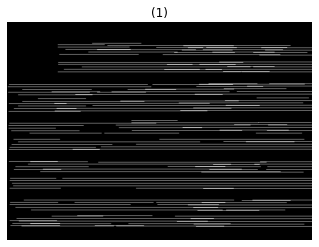

peak 792
0
1
2
3
4
5
6
7
8


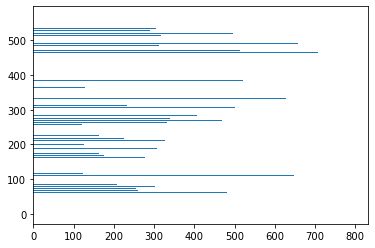

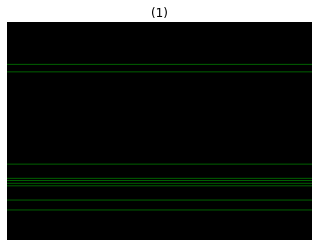

In [178]:
img = sk.io.imread('test.jpg',as_gray=True)


# noise removal 
#img = sk.filters.gaussian(img)
#img = sk.filters.median(img)

# rotate 
#img = sp.ndimage.interpolation.rotate(img, 30, reshape=True, order=0)

# Equalization
#img_eq = sk.exposure.equalize_hist(img)
#img =  sk.feature.canny(img)
#thresh 
t = sk.filters.threshold_otsu(img)

img_b = img < t
# skew correction

def find_score(arr, angle):
    data = sp.ndimage.interpolation.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
delta = 1
limit = 30
#angles = np.arange(-limit, limit+delta, delta)
#scores = []
#for angle in angles:
#    hist, score = find_score(img_b, angle)
#    scores.append(score)
#best_score = max(scores)
#best_angle = angles[scores.index(best_score)]
#print('Best angle: '+str(best_angle))
# correct skew
#img_n = sp.ndimage.interpolation.rotate(img_b, best_angle, reshape=False, order=0)
#img_thin = sk.morphology.thin(img_n,100)

img_thin = sk.morphology.skeletonize(img_b == True)
se = np.zeros((7,21))
for i in range(21):
    se[3,i] = 1


#for i in range(10):
#    img_thin = sk.morphology.dilation(img_n,se)
#    img_thin = sk.morphology.erosion(img_n,se)

#img_thin = sk.morphology.opening(img_thin)
#fil =  [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
#img_thin = sp.signal.convolve2d(img_thin,fil)
#t = sk.filters.threshold_otsu(img_thin)

#img_thin = img_thin > t
for i in range(5):
   #img_thin = sk.morphology.dilation(img_thin,se)
   img_thin = sk.morphology.erosion(img_thin,se)
   #img_thin = sk.morphology.erosion(img_thin,se)
   img_thin = sk.morphology.dilation(img_thin,se)
   img_thin = sk.morphology.dilation(img_thin,se)

#img_thin = sk.transform.rescale(img_thin, [3,1], anti_aliasing=True)
#img_thin = sk.feature.canny(img_thin)
#t = sk.filters.threshold_otsu(img_thin)

#img_thin = img_thin < t
show_images([img_thin])
horz = np.sum(img_thin,axis=1)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = sk.transform.hough_line(img_thin, theta=tested_angles)


i=0

origin = np.array((0, img_thin.shape[1]-1))
'''
for _, angle, dist in zip(*sk.transform.hough_line_peaks(h, theta, d)):
    #print(dist)
    try:
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        y0 = int(y0)
        y1 = int(y1)
        dist = int(dist)
        
        if abs(y0 - y1) < 20:
            rr, cc = sk.draw.line(dist,0,dist,origin[1])
            
            img_thin[rr,cc] = False
            i +=1
    except:
        i += 1
        continue


'''
peak = np.max(horz)
nums= np.arange(start=0, stop=img_thin.shape[0], step=1)
#print(nums,horz)
plt.figure()
mp.pyplot.barh(nums, horz)
print("peak "+str(peak))
j=0
img_lines = np.uint8(np.zeros((img_thin.shape[0],img_thin.shape[1],3)))
for x in horz:
    #print("x "+str(x))
    if peak-x < 150 : 
        print(j)
        rr, cc = sk.draw.line(i,0,i,origin[1])
        img_thin[rr,cc] = True
        img_lines[rr,cc] = [0,255,0]
        #rr, cc = sk.draw.line(i+1,0,i+1,origin[1])
        #img_lines[rr,cc] = [0,255,0]
        #rr, cc = sk.draw.line(i+2,0,i+2,origin[1])
        #img_lines[rr,cc] = [0,0,255]
        j+=1
    i +=1

#print(img_lines)
#show_images([img,img_eq,img_b,img_n,img_thin])
show_images([img_lines])